In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100
import json
from datetime import datetime
from dateutil.parser import parse

### 전체 데이터 load

In [2]:
ex1 = pd.read_csv('result/ex1.csv', encoding="euc-kr")
ex2 = pd.read_csv('result/ex2.csv', encoding="euc-kr")
ex3= pd.read_csv('result/ex3.csv', encoding="euc-kr")

In [3]:
ex3

풍향(16방위)    봄   여름    가을    겨울
0        0.0   79  163   130    77
1       20.0  381  310  1083  1040
2       50.0  175  139   420   218
3       70.0   45   58   211    53
4       90.0  120  214   372   143
5      110.0   97  211   248   148
6      140.0  170  263   306   198
7      160.0  256  248   374   377
8      180.0  355  320   240   336
9      200.0  527  452   125   224
10     230.0  961  771   106   233
11     250.0  972  979   199   216
12     270.0  683  890   317   228
13     290.0  309  325   274   230
14     320.0  310  241   315   366
15     340.0  774  728   893  1423
16     360.0  410  311   938   994

# ex1) 일조 일사량에 따른 기온과 지면온도의 차이 

### 사용하는 데이터

In [4]:
ex1

일시  기온(°C)  지면온도(°C)  일조X일사   온도차
0    2015-01-01 12:00    -6.9      -0.6  1.410   6.3
1    2015-01-02 12:00    -4.1      -0.5  1.370   3.6
2    2015-01-03 12:00     0.2      -0.4  1.330  -0.6
3    2015-01-05 12:00     6.4       0.1  1.120  -6.3
4    2015-01-06 12:00    -3.5       0.2  1.490   3.7
5    2015-01-07 12:00    -4.1      -0.3  1.450   3.8
6    2015-01-08 12:00    -3.5      -0.4  1.420   3.1
7    2015-01-09 12:00     0.5      -0.3  1.010  -0.8
8    2015-01-10 12:00     3.6      -0.3  1.400  -3.9
9    2015-01-11 12:00    -0.2       0.0  1.400   0.2
10   2015-01-12 12:00    -1.3      -0.3  1.390   1.0
11   2015-01-13 12:00     1.5      -0.2  1.120  -1.7
12   2015-01-15 12:00     3.8       0.0  1.120  -3.8
13   2015-01-16 12:00     3.0       0.2  1.030  -2.8
14   2015-01-17 12:00    -3.7      -0.2  1.510   3.5
15   2015-01-19 12:00     2.0       0.6  1.340  -1.4
16   2015-01-22 12:00     4.0       0.6  1.040  -3.4
17   2015-01-24 12:00     6.3       4.6  1.320  -1.7
18   2015-01-27 12:00    -3.8       0.3  1.620   4.1
19   2015-01-28 12:00    -3.8       0.1  1.410   3.9
20   2015-01-30 12:00    -1.7       0.1  1.580   1.8
21   2015-01-31 12:00    -4.2       0.0  1.580   4.2
22   2015-02-01 12:00    -1.5       0.0  1.630   1.5
23   2015-02-02 12:00     0.5       0.0  1.500  -0.5
24   2015-02-03 12:00     2.9       0.0  1.130  -2.9
25   2015-02-04 12:00     2.2       0.1  1.053  -2.1
26   2015-02-05 12:00     0.8       0.1  1.460  -0.7
27   2015-02-06 12:00     3.3       0.1  1.630  -3.2
28   2015-02-07 12:00     4.2       0.2  1.150  -4.0
29   2015-02-08 12:00    -9.2      -0.3  1.700   8.9
30   2015-02-09 12:00    -3.7      -0.2  1.680   3.5
31   2015-02-10 12:00     4.7       0.3  1.280  -4.4
32   2015-02-11 12:00     2.7       2.2  1.630  -0.5
33   2015-02-12 12:00    -0.5       0.1  1.760   0.6
34   2015-02-13 12:00     0.4       0.1  1.780  -0.3
35   2015-02-15 12:00    10.0       8.0  1.330  -2.0
36   2015-02-17 12:00     2.7       6.9  1.430   4.2
37   2015-02-18 12:00     2.7       7.6  1.490   4.9
38   2015-02-19 12:00     3.1       7.0  1.770   3.9
39   2015-02-20 12:00     7.8       7.5  1.043  -0.3
40   2015-02-23 12:00     1.8       6.5  1.310   4.7
41   2015-02-24 12:00     3.6       8.7  1.870   5.1
42   2015-02-25 12:00     7.8      10.2  1.640   2.4
43   2015-02-26 12:00     2.3       8.9  1.970   6.6
44   2015-02-27 12:00    -2.3       0.2  2.000   2.5
45   2015-03-02 12:00     6.5      10.8  1.970   4.3
46   2015-03-04 12:00    -0.5       0.2  2.150   0.7
47   2015-03-06 12:00     6.0       8.7  2.060   2.7
48   2015-03-07 12:00     5.6      12.2  2.050   6.6
49   2015-03-08 12:00     9.0      13.5  1.870   4.5
..                ...     ...       ...    ...   ...
703  2017-10-04 12:00    18.2      28.6  1.630  10.4
704  2017-10-05 12:00    21.3      28.9  1.250   7.6
705  2017-10-06 12:00    23.2      32.6  1.096   9.4
706  2017-10-07 12:00    22.0      32.3  1.144  10.3
707  2017-10-08 12:00    24.0      33.2  1.450   9.2
708  2017-10-13 12:00    14.0      20.3  1.360   6.3
709  2017-10-14 12:00    16.4      23.3  1.420   6.9
710  2017-10-15 12:00    19.1      25.4  1.470   6.3
711  2017-10-17 12:00    18.4      28.7  1.400  10.3
712  2017-10-19 12:00    19.0      26.9  1.210   7.9
713  2017-10-20 12:00    19.0      29.9  1.360  10.9
714  2017-10-21 12:00    18.9      33.8  1.330  14.9
715  2017-10-22 12:00    20.8      34.3  1.340  13.5
716  2017-10-23 12:00    15.8      32.3  1.300  16.5
717  2017-10-24 12:00    16.7      31.9  1.260  15.2
718  2017-10-25 12:00    16.3      32.9  1.340  16.6
719  2017-10-27 12:00    18.5      32.5  1.260  14.0
720  2017-10-28 12:00    19.9      33.9  1.250  14.0
721  2017-10-29 12:00    14.1      26.1  1.240  12.0
722  2017-10-30 12:00     8.9      25.7  1.350  16.8
723  2017-10-31 12:00    14.0      22.1  1.300   8.1
724  2017-11-03 12:00    14.3      22.1  1.060   7.8
725  2017-11-04 12:00     9.6      21.6  1.210  12.0
726  2017-11-05 12:00    13.0      23.8  1.2

### 3년간 일조X일사량과 그에 다른 지온-기온 값

In [5]:
#데이터 처리 (일조량이 1시간동안 1MJ이상 영향을 끼친 경우)
#온도차의 영상은 지면>기온
sun=ex1['일조X일사'].mean()
tem= ex1['온도차'].mean()

print('시간당 평균 일사량 :',sun,'MJ \n지면과 기온의 평균 온도차 :',tem,'°C')

시간당 평균 일사량 : 1.9625949535192548 MJ 
지면과 기온의 평균 온도차 : 9.131208499335987 °C


### 각 계절별 기온, 일사력, 온도차 평균값 추출

In [6]:
spring = []
summer = []
fall = []
winter = []

for x in ex1['일시']:
    if (datetime.strptime(x, '%Y-%m-%d %H:%M').month>2) and (datetime.strptime(x, '%Y-%m-%d %H:%M').month<6):
        spring.append(x)
    elif (datetime.strptime(x, '%Y-%m-%d %H:%M').month>5) and (datetime.strptime(x, '%Y-%m-%d %H:%M').month<9):
        summer.append(x)
    elif (datetime.strptime(x, '%Y-%m-%d %H:%M').month>8) and (datetime.strptime(x, '%Y-%m-%d %H:%M').month<12):
        fall.append(x)
    else :
        winter.append(x)
        
spring = DataFrame({'일시':spring})
summer = DataFrame({'일시':summer})
fall = DataFrame({'일시':fall})
winter = DataFrame({'일시':winter})

spring=pd.merge(ex1,spring)
summer=pd.merge(ex1,summer)
fall=pd.merge(ex1,fall)
winter=pd.merge(ex1,winter)

In [7]:
springtemp=spring['기온(°C)'].mean()
springsun=spring['일조X일사'].mean()
springdif=spring['온도차'].mean()
springgt=spring['지면온도(°C)'].mean()

summertemp=summer['기온(°C)'].mean()
summersun=summer['일조X일사'].mean()
summerdif=summer['온도차'].mean()
summergt=summer['지면온도(°C)'].mean()

falltemp=fall['기온(°C)'].mean()
fallsun=fall['일조X일사'].mean()
falldif=fall['온도차'].mean()
fallgt=fall['지면온도(°C)'].mean()

wintertemp=winter['기온(°C)'].mean()
wintersun=winter['일조X일사'].mean()
winterdif=winter['온도차'].mean()
wintergt=winter['지면온도(°C)'].mean()

### 데이터 정렬 데이터 프레임 재생성

In [8]:
result = DataFrame({'Average Temperature':[springtemp,summertemp,falltemp,wintertemp],
                    'Average Sunpower':[springsun,summersun,fallsun,wintersun],
                   'Average Temperature Difference':[springdif,summerdif,falldif,winterdif],
                   'Average Ground Temperature':[springgt,summergt,fallgt,wintergt]},index=['Spring','Summer','Fall','Winter'])
result =result.reindex(['Average Temperature','Average Ground Temperature','Average Sunpower','Average Temperature Difference'],axis=1)
result

Average Temperature  Average Ground Temperature  Average Sunpower  \
Spring            15.055607                   27.713084          2.335687   
Summer            26.916860                   38.961628          2.274843   
Fall              18.299468                   26.825000          1.725000   
Winter             0.545251                    3.297207          1.466056   

        Average Temperature Difference  
Spring                       12.657477  
Summer                       12.044767  
Fall                          8.525532  
Winter                        2.751955

### 그래프

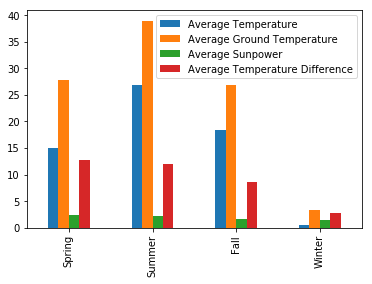

In [9]:
result.plot(kind='bar')

# ex2) 장마(비가 24시간동안 오는) 시즌 찾기 

### 사용하는 데이터

In [10]:
ex2

일시  강수량(mm)  비가 내린 시간
0   2015-04-14 20:00      0.4        14
1   2015-04-20 06:00      0.4        21
2   2015-06-26 09:00      0.2        15
3   2015-07-12 20:00      0.3        21
4   2015-07-13 12:00      0.1        15
5   2015-07-24 16:00      0.3        20
6   2016-04-17 06:00      0.1        15
7   2016-05-03 11:00      0.7        17
8   2016-05-16 02:00      0.2        13
9   2016-07-02 00:00      0.1        13
10  2016-07-05 12:00      0.9        23
11  2017-04-06 05:00      0.1        17
12  2017-06-07 12:00      0.1        17
13  2017-07-11 02:00      1.9        16
14  2017-08-15 20:00      0.5        13
15  2017-08-20 14:00      0.3        15

### 비가 제일 오래 오는 달 (5개의 데이터중 일시를 추출)
### 비가 내린 날을 역순으로 정렬 후 5개 추출

In [11]:
longt=ex2.sort_values(by='비가 내린 시간',ascending=False)[:5]
longt

일시  강수량(mm)  비가 내린 시간
10  2016-07-05 12:00      0.9        23
1   2015-04-20 06:00      0.4        21
3   2015-07-12 20:00      0.3        21
5   2015-07-24 16:00      0.3        20
7   2016-05-03 11:00      0.7        17

### 추출된 데이터를 카운팅

In [12]:
month = []
for x in longt['일시']:
    month.append(datetime.strptime(x, '%Y-%m-%d %H:%M').month)
        
month = DataFrame(month)
month=DataFrame({'Times':month[0].value_counts()})
month

Times
7      3
5      1
4      1

### 그래프

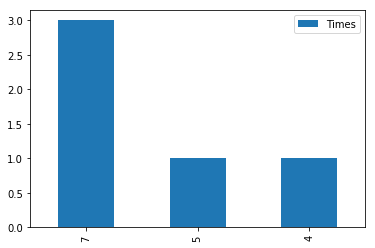

In [13]:
month.plot(kind='bar')

### 비가 제일 많이 왔던 달(Month) (3번째 까지)

In [14]:
month = []
for x in ex2['일시']:
    month.append(datetime.strptime(x, '%Y-%m-%d %H:%M').month)
        
month = DataFrame(month)
month=DataFrame({'횟수':month[0].value_counts()})
month[:3]

횟수
7   6
4   4
8   2

### 그래프 (전체 데이터)

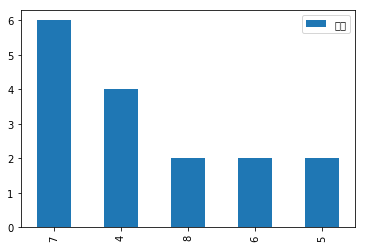

In [15]:
month.plot(kind='bar')

### 비가 제일 많이 왔던 일(Day) (3번째 까지)

In [16]:
day = []
for x in ex2['일시']:
    day.append(datetime.strptime(x, '%Y-%m-%d %H:%M').day)
        
day = DataFrame(day)
day=DataFrame({'횟수':day[0].value_counts()})
day[:3]

횟수
20   2
26   1
24   1

### 그래프 (전체 데이터)

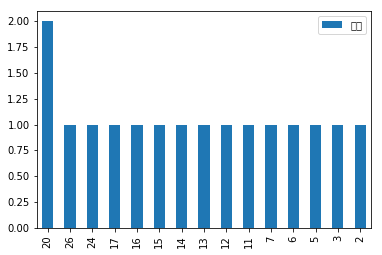

In [17]:
day.plot(kind='bar')

### 오랫동안 비가 오고 그친 시간(Hour) (3번째 까지)

In [18]:
hour = []
for x in ex2['일시']:
    hour.append(datetime.strptime(x, '%Y-%m-%d %H:%M').hour)
        
hour = DataFrame(hour)
hour=DataFrame({'횟수':hour[0].value_counts()})
hour[:3]

횟수
12   3
20   3
6    2

### 그래프 (전체 데이터)

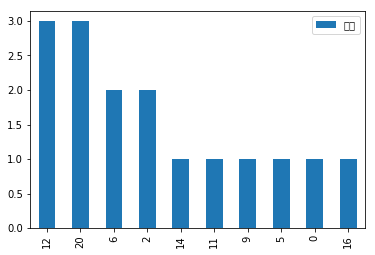

In [19]:
hour.plot(kind='bar')

# ex3) 계절에 따른 바람의 방향

### 사용하는 데이터

In [20]:
ex3 =ex3.rename(columns={'풍향(16방위)':'Wind Direction','봄':'Spring','여름':'Summer','가을':'Fall','겨울':'Winter'})
ex3

Wind Direction  Spring  Summer  Fall  Winter
0              0.0      79     163   130      77
1             20.0     381     310  1083    1040
2             50.0     175     139   420     218
3             70.0      45      58   211      53
4             90.0     120     214   372     143
5            110.0      97     211   248     148
6            140.0     170     263   306     198
7            160.0     256     248   374     377
8            180.0     355     320   240     336
9            200.0     527     452   125     224
10           230.0     961     771   106     233
11           250.0     972     979   199     216
12           270.0     683     890   317     228
13           290.0     309     325   274     230
14           320.0     310     241   315     366
15           340.0     774     728   893    1423
16           360.0     410     311   938     994

### 그래프

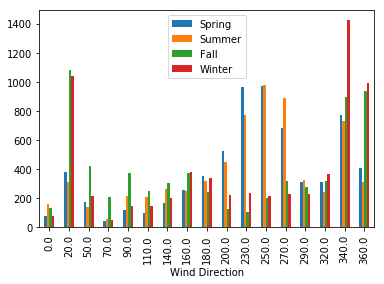

In [21]:
ex3.set_index('Wind Direction').plot(kind='bar')

### 500번 이상 카운팅된 풍향을 추출

In [22]:
ex_3=ex3.ix[:,ex3.columns != 'Wind Direction']
#카운팅된 풍향을 조정
ex_3=ex_3[ex_3>500].dropna(how='all')
#데이터 프레임 화
ex_3=pd.merge(ex3.drop(ex3.columns[[1,2,3,4]],axis=1),ex_3,left_index=True,right_index=True )
ex_3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Wind Direction  Spring  Summer    Fall  Winter
1             20.0     NaN     NaN  1083.0  1040.0
9            200.0   527.0     NaN     NaN     NaN
10           230.0   961.0   771.0     NaN     NaN
11           250.0   972.0   979.0     NaN     NaN
12           270.0   683.0   890.0     NaN     NaN
15           340.0   774.0   728.0   893.0  1423.0
16           360.0     NaN     NaN   938.0   994.0

### 그래프

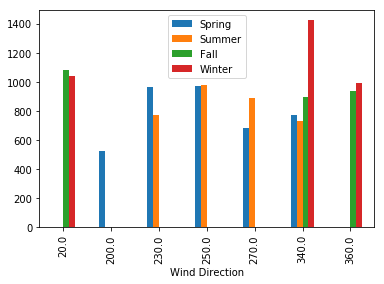

In [23]:
ex_3.set_index('Wind Direction').plot(kind='bar')